<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-31 21:09:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: 'survey-results-public.sqlite.1'

     0K .......... .......... .......... .......... ..........  0% 1.78M 1m53s
    50K .......... .......... .......... .......... ..........  0% 2.63M 95s
   100K .......... .......... .......... .......... ..........  0% 6.35M 74s
   150K .......... .......... .......... .......... ..........  0% 6.34M 63s
   200K .......... .......... .......... .......... ..........  0% 3.67M 62s
   250K .

#### 2. Connect to the Database


**Install the needed libraries**


In [4]:
!pip install pandas

In [5]:
!pip install matplotlib

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [7]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


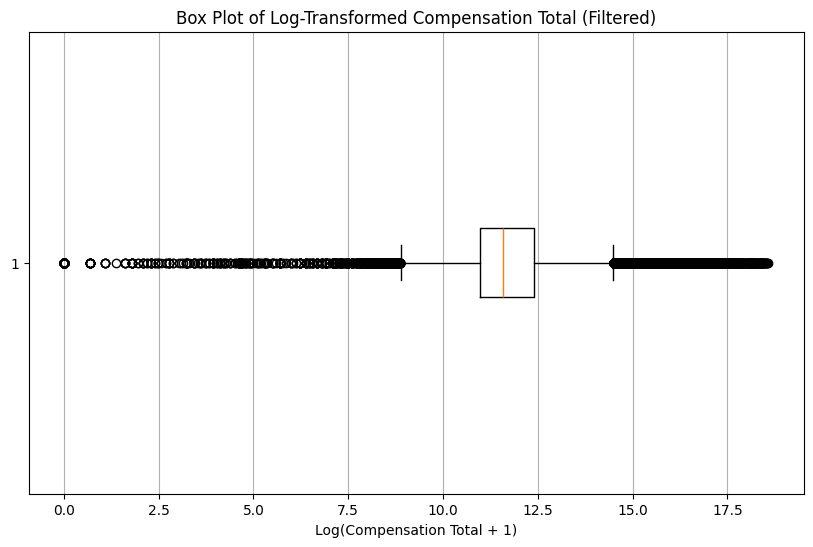

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Step 2: Load the 'main' table into a DataFrame
df = pd.read_sql("SELECT * FROM main", conn)

# Step 3: Drop rows where 'CompTotal' is NaN
df_CompTotal = df.dropna(subset=['CompTotal'])

# Step 4: Remove top 1% extreme outliers
q99 = df_CompTotal['CompTotal'].quantile(0.99)
filtered_df = df_CompTotal[df_CompTotal['CompTotal'] < q99]

# ✅ Step 5: Apply log transformation to Compensation Total
log_comp = np.log1p(filtered_df['CompTotal'])  # log1p handles zero values safely

# Step 6: Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(log_comp, vert=False)
plt.title('Box Plot of Log-Transformed Compensation Total (Filtered)')
plt.xlabel('Log(Compensation Total + 1)')
plt.grid(axis='x')
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


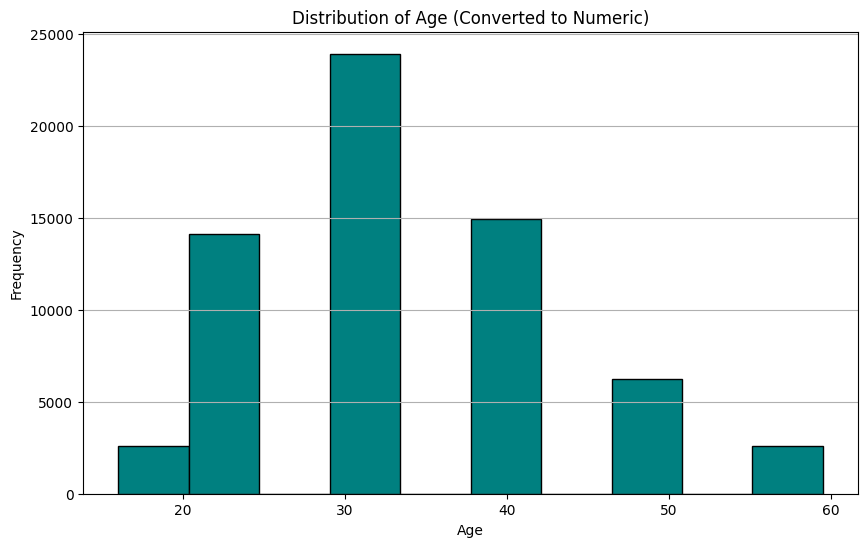

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Clean the Age column
df['Age_clean'] = df['Age'].str.replace(' years old', '', regex=False)

# Step 2: Map to numeric values using midpoints
age_map = {
    'Under 18': 16,
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65 or older': 67,
    'Prefer not to say': None
}

df['Age_numeric'] = df['Age_clean'].map(age_map)

# Step 3: Drop missing values (e.g., 'Prefer not to say')
df_age = df.dropna(subset=['Age_numeric'])

# Step 4: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_age['Age_numeric'], bins=10, color='teal', edgecolor='black')
plt.title('Distribution of Age (Converted to Numeric)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()



### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


C:\Users\beall\AppData\Local\Temp\ipykernel_16576\287443368.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_comp['Age'] = df_age_comp['Age'].str.replace(' years old', '', regex=False)
C:\Users\beall\AppData\Local\Temp\ipykernel_16576\287443368.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_age_comp, x='Age', y='LogCompTotal', palette='Set2')


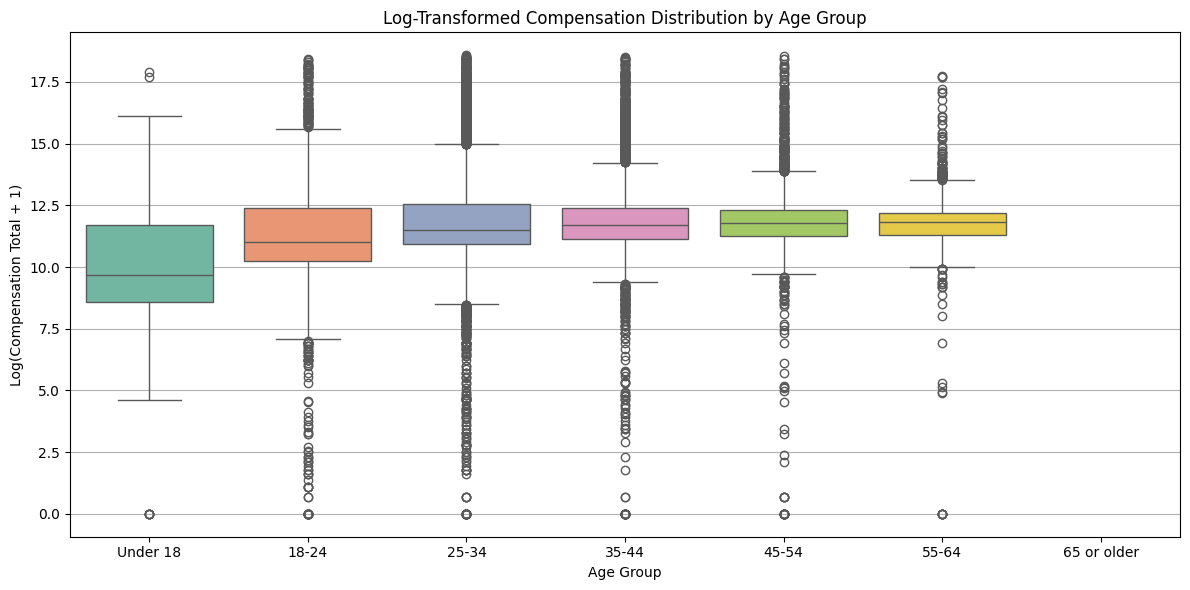

In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Connect to SQLite and load the 'main' table
conn = sqlite3.connect('survey-results-public.sqlite')
df = pd.read_sql("SELECT * FROM main", conn)

# Step 1: Drop rows with missing Age or CompTotal
df_age_comp = df.dropna(subset=['Age', 'CompTotal'])

# Step 2: Clean Age strings (remove ' years old')
df_age_comp['Age'] = df_age_comp['Age'].str.replace(' years old', '', regex=False)

# Step 3: Filter out top 1% outliers in compensation
q99 = df_age_comp['CompTotal'].quantile(0.99)
df_age_comp = df_age_comp[df_age_comp['CompTotal'] < q99]

# Step 4: Log transform the compensation
df_age_comp['LogCompTotal'] = np.log1p(df_age_comp['CompTotal'])

# Step 5: Set ordered age groups for consistent x-axis
age_order = [
    'Under 18', '18-24', '25-34', '35-44',
    '45-54', '55-64', '65 or older'
]
df_age_comp = df_age_comp[df_age_comp['Age'].isin(age_order)]
df_age_comp['Age'] = pd.Categorical(df_age_comp['Age'], categories=age_order, ordered=True)

# Step 6: Plot the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_age_comp, x='Age', y='LogCompTotal', palette='Set2')
plt.title('Log-Transformed Compensation Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Log(Compensation Total + 1)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


C:\Users\beall\AppData\Local\Temp\ipykernel_16576\3086017904.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sat, x='JobSatPoints_6', y='LogCompTotal', palette='Set2', fill=False)
C:\Users\beall\AppData\Local\Temp\ipykernel_16576\3086017904.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.boxplot(data=df_sat, x='JobSatPoints_6', y='LogCompTotal', palette='Set2', fill=False)


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

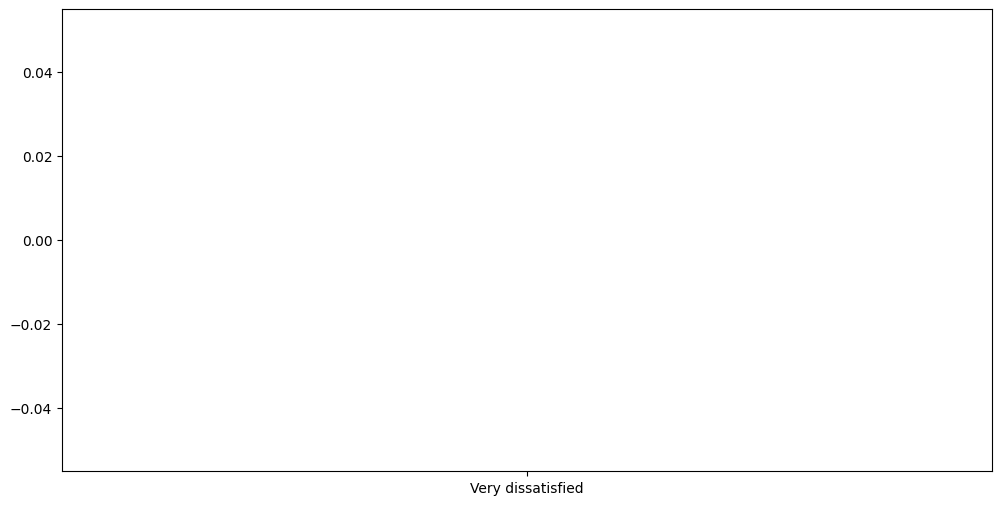

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Drop rows with missing CompTotal or JobSatPoints_6
df_sat = df.dropna(subset=['CompTotal', 'JobSatPoints_6'])

# Step 2: Remove top 1% of compensation outliers
q99 = df_sat['CompTotal'].quantile(0.99)
df_sat = df_sat[df_sat['CompTotal'] < q99]

# Step 3: Apply log transformation
df_sat['LogCompTotal'] = np.log1p(df_sat['CompTotal'])

# Step 4: Set job satisfaction order (adjust based on your data)
satisfaction_order = [
    'Very dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Very satisfied'
]
df_sat['JobSatPoints_6'] = pd.Categorical(df_sat['JobSatPoints_6'], categories=satisfaction_order, ordered=True)

# Step 5: Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sat, x='JobSatPoints_6', y='LogCompTotal', palette='Set2', fill=False)
plt.title('Log-Transformed Compensation by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Log(Compensation Total + 1)')
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


C:\Users\beall\AppData\Local\Temp\ipykernel_16576\2536490546.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='DevType', y='LogComp', palette='Set3', fill=False)


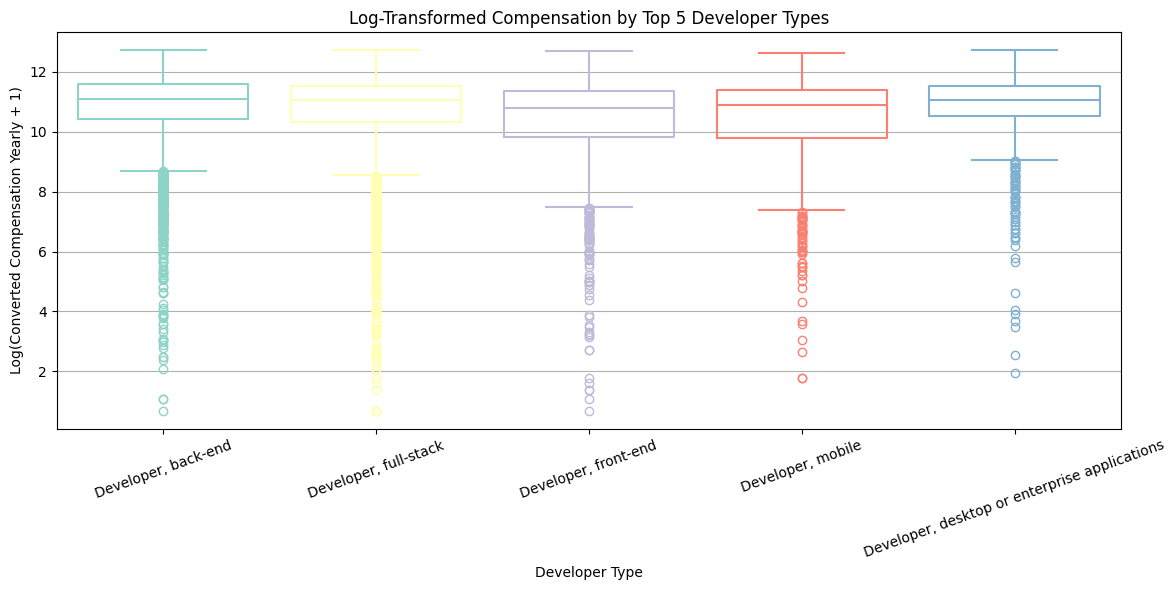

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load data (you probably already have this as df)
# df = pd.read_sql("SELECT * FROM main", conn)  # if not already loaded

# Step 2: Drop rows with missing DevType or ConvertedCompYearly
df_dev = df.dropna(subset=['DevType', 'ConvertedCompYearly'])

# Step 3: Get the top 5 most common developer types
top_devtypes = (
    df_dev['DevType']
    .value_counts()
    .head(5)
    .index.tolist()
)

# Step 4: Filter only top 5 DevTypes
df_top = df_dev[df_dev['DevType'].isin(top_devtypes)]

# Step 5: Remove top 1% of compensation outliers
q99 = df_top['ConvertedCompYearly'].quantile(0.99)
df_top = df_top[df_top['ConvertedCompYearly'] < q99]

# Step 6: Log-transform compensation
df_top['LogComp'] = np.log1p(df_top['ConvertedCompYearly'])

# Step 7: Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='DevType', y='LogComp', palette='Set3', fill=False)
plt.title('Log-Transformed Compensation by Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Log(Converted Compensation Yearly + 1)')
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


C:\Users\beall\AppData\Local\Temp\ipykernel_16576\323234263.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_countries, x='Country', y='LogCompTotal', palette='Set2', fill=False)


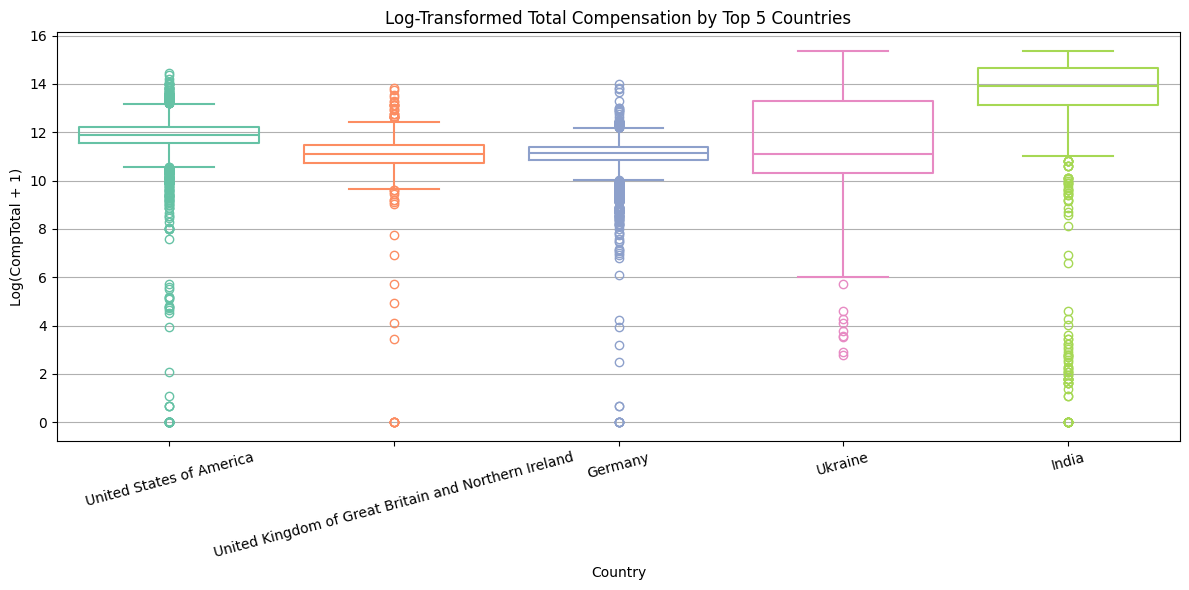

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Drop rows with missing values
df_country = df.dropna(subset=['CompTotal', 'Country'])

# Step 2: Find the top 5 countries by respondent count
top_countries = (
    df_country['Country']
    .value_counts()
    .head(5)
    .index.tolist()
)

# Step 3: Filter for only those top 5 countries
df_top_countries = df_country[df_country['Country'].isin(top_countries)]

# Step 4: Remove top 1% compensation outliers
q99 = df_top_countries['CompTotal'].quantile(0.99)
df_top_countries = df_top_countries[df_top_countries['CompTotal'] < q99]

# Step 5: Log transform compensation
df_top_countries['LogCompTotal'] = np.log1p(df_top_countries['CompTotal'])

# Step 6: Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_countries, x='Country', y='LogCompTotal', palette='Set2', fill=False)
plt.title('Log-Transformed Total Compensation by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Log(CompTotal + 1)')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


C:\Users\beall\AppData\Local\Temp\ipykernel_16576\3083888310.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_emp_top5, x='Employment', y='LogCompTotal', palette='Set1', fill=False)


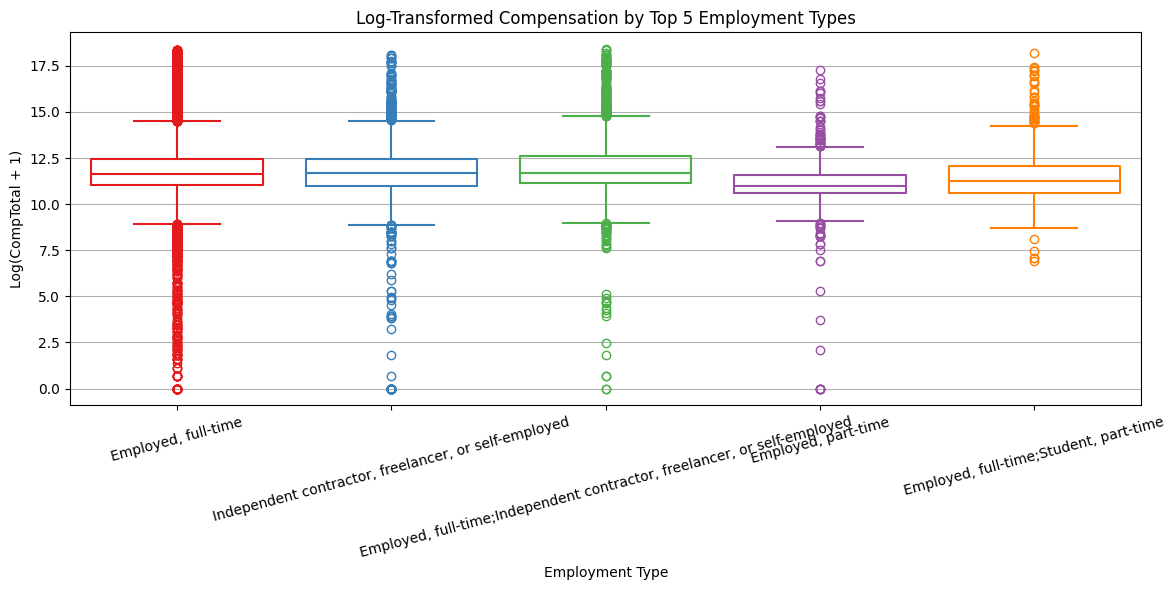

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Drop rows with missing CompTotal or Employment
df_emp = df.dropna(subset=['CompTotal', 'Employment'])

# Step 2: Identify the top 5 employment types
top_employment = (
    df_emp['Employment']
    .value_counts()
    .head(5)
    .index.tolist()
)

# Step 3: Filter to only top 5 types
df_emp_top5 = df_emp[df_emp['Employment'].isin(top_employment)]

# Step 4: Remove top 1% of CompTotal values (outliers)
q99 = df_emp_top5['CompTotal'].quantile(0.99)
df_emp_top5 = df_emp_top5[df_emp_top5['CompTotal'] < q99]

# Step 5: Log-transform CompTotal
df_emp_top5['LogCompTotal'] = np.log1p(df_emp_top5['CompTotal'])

# Step 6: Set category order for plotting (optional but helps ordering)
df_emp_top5['Employment'] = pd.Categorical(df_emp_top5['Employment'], categories=top_employment, ordered=True)

# Step 7: Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_emp_top5, x='Employment', y='LogCompTotal', palette='Set1', fill=False)
plt.title('Log-Transformed Compensation by Top 5 Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Log(CompTotal + 1)')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


C:\Users\beall\AppData\Local\Temp\ipykernel_16576\3292861625.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['YearsCodeProNumeric'] = df_exp['YearsCodePro'].apply(convert_years_code)
C:\Users\beall\AppData\Local\Temp\ipykernel_16576\3292861625.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_exp, x='JobSatPoints_6', y='YearsCodeProNumeric', palette='Blues', fill=False)
C:\Users\beall\AppData\Local\Temp\ipykernel_16576\3292861625.py:37: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.boxplot(data=df_exp, x='JobSatPoints_6', y='YearsCodeProNu

UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

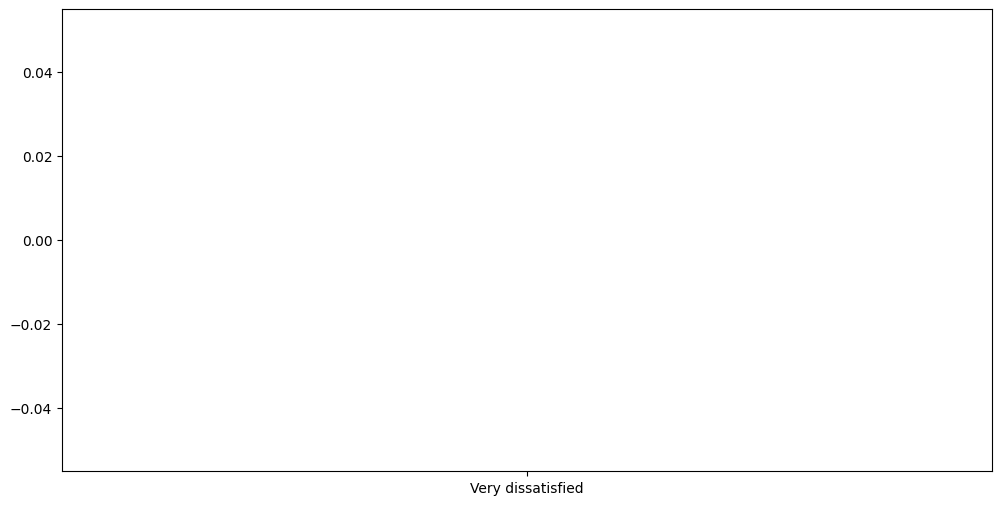

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Drop rows with missing values
df_exp = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# Step 2: Convert YearsCodePro to numeric
def convert_years_code(val):
    if val == 'Less than 1 year':
        return 0.5
    elif val == 'More than 50 years':
        return 51
    try:
        return float(val)
    except:
        return np.nan

df_exp['YearsCodeProNumeric'] = df_exp['YearsCodePro'].apply(convert_years_code)

# Drop any remaining NaNs
df_exp = df_exp.dropna(subset=['YearsCodeProNumeric'])

# Step 3: Set job satisfaction order (customize if needed)
satisfaction_order = [
    'Very dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Very satisfied'
]
df_exp['JobSatPoints_6'] = pd.Categorical(df_exp['JobSatPoints_6'], categories=satisfaction_order, ordered=True)

# Step 4: Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_exp, x='JobSatPoints_6', y='YearsCodeProNumeric', palette='Blues', fill=False)
plt.title('Professional Coding Experience by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [25]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
